In [2]:
#!pip3 install --upgrade retentioneering
#from retentioneeringtools import retentioneering
#import pandas as pd
#!pip3 install --upgrade retentioneeringtools/

In [1]:
import retentioneering
import pandas as pd

In [2]:
# df=pd.read_csv('test.csv')
df= retentioneering.datasets.load_simple_shop()
df.columns

Index(['user_id', 'event', 'timestamp'], dtype='object')

In [3]:
df.rete.set_config({
        'user_col': 'user_id',
        'event_col':'event',
        'event_time_col':'timestamp'
})

In [4]:
#Explore segments, initial segment of all users must be filled
df.rete.segments.show_segments()

,user_col,initial_dataset_users.0
0,219483890,1
1,964964743,1
2,629881394,1
3,629881395,1
4,495985018,1
...,...,...
3746,125426031,1
3747,26773318,1
3748,965024600,1
3749,831491833,1


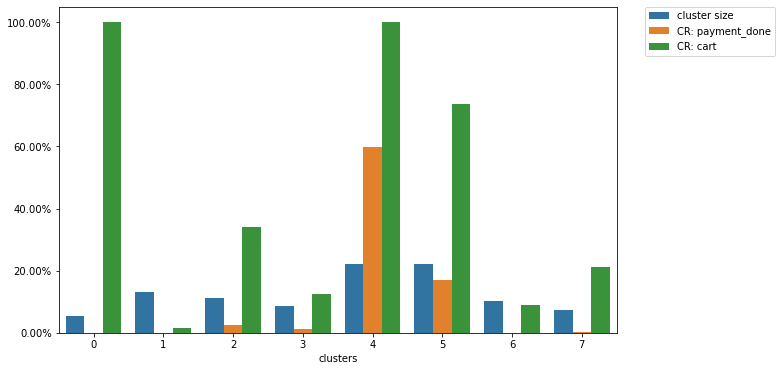

In [5]:
df.rete.get_clusters(method='kmeans',
                       n_clusters=8,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['payment_done','cart'],export_segments='1clusters_run');


In [6]:
#Now clusters are filled
df.rete.segments.show_segments()

,user_col,initial_dataset_users.0,1clusters_run.0,1clusters_run.1,1clusters_run.2,1clusters_run.3,1clusters_run.4,1clusters_run.5,1clusters_run.6,1clusters_run.7
0,219483890,1,0,0,0,0,0,1,0,0
1,964964743,1,0,0,0,0,1,0,0,0
2,629881394,1,0,0,0,0,0,1,0,0
3,629881395,1,0,0,0,0,1,0,0,0
4,495985018,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3746,125426031,1,0,0,0,0,1,0,0,0
3747,26773318,1,0,0,0,0,0,0,1,0
3748,965024600,1,0,0,1,0,0,0,0,0
3749,831491833,1,0,0,1,0,0,0,0,0


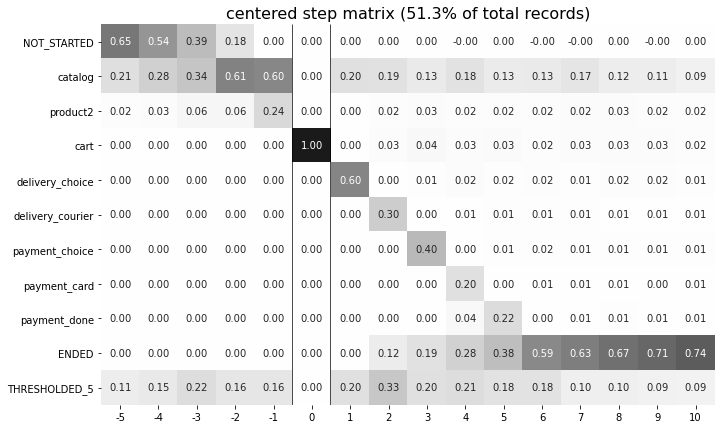

In [7]:
stepmatrix=df.rete.step_matrix(max_steps=16,
                      thresh = 0.2,
                      centered={'event':'cart',
                                'left_gap':5,
                                'occurrence':1},export_segments='StepMatrixSegment');

In [8]:
#Now we will get step matrix segment of users who had the central event
df.rete.segments.show_segments()

,user_col,initial_dataset_users.0,1clusters_run.0,1clusters_run.1,1clusters_run.2,1clusters_run.3,1clusters_run.4,1clusters_run.5,1clusters_run.6,1clusters_run.7,StepMatrixSegment.0
0,219483890,1,0,0,0,0,0,1,0,0,1
1,964964743,1,0,0,0,0,1,0,0,0,1
2,629881394,1,0,0,0,0,0,1,0,0,1
3,629881395,1,0,0,0,0,1,0,0,0,1
4,495985018,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3746,125426031,1,0,0,0,0,1,0,0,0,1
3747,26773318,1,0,0,0,0,0,0,1,0,0
3748,965024600,1,0,0,1,0,0,0,0,0,0
3749,831491833,1,0,0,1,0,0,0,0,0,1


In [9]:
#Now lets try to build our custom segment
df.rete.segments.add_segment('users_visisted_cart',df[df['event']=='cart']['user_id'].unique())

In [10]:
df.rete.segments.show_segments()

,user_col,initial_dataset_users.0,1clusters_run.0,1clusters_run.1,1clusters_run.2,1clusters_run.3,1clusters_run.4,1clusters_run.5,1clusters_run.6,1clusters_run.7,StepMatrixSegment.0,users_visisted_cart.0
0,219483890,1,0,0,0,0,0,1,0,0,1,1
1,964964743,1,0,0,0,0,1,0,0,0,1,1
2,629881394,1,0,0,0,0,0,1,0,0,1,1
3,629881395,1,0,0,0,0,1,0,0,0,1,1
4,495985018,1,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3746,125426031,1,0,0,0,0,1,0,0,0,1,1
3747,26773318,1,0,0,0,0,0,0,1,0,0,0
3748,965024600,1,0,0,1,0,0,0,0,0,0,0
3749,831491833,1,0,0,1,0,0,0,0,0,1,1
